## Multicollinearity

## How is the prediction affected by adding additional predictor variables?

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression

In [2]:
%pwd

'/home/suzyq76/uclax-data-science/01-iris-03-why-estimate-f'

In [3]:
%ls

04-why-estimate-f-prediction.ipynb  06-multicollinearity.ipynb         data/
05-the-train-test-split.ipynb       07-why-estimate-f-inference.ipynb


In [4]:
IRIS_DATA_LOCATION = 'data/iris.csv'

In [5]:
iris_df = pd.read_csv(IRIS_DATA_LOCATION, index_col=0)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
petal_width_prediction_1_var = np.load('data/petal_width_prediction_1_var.npy')

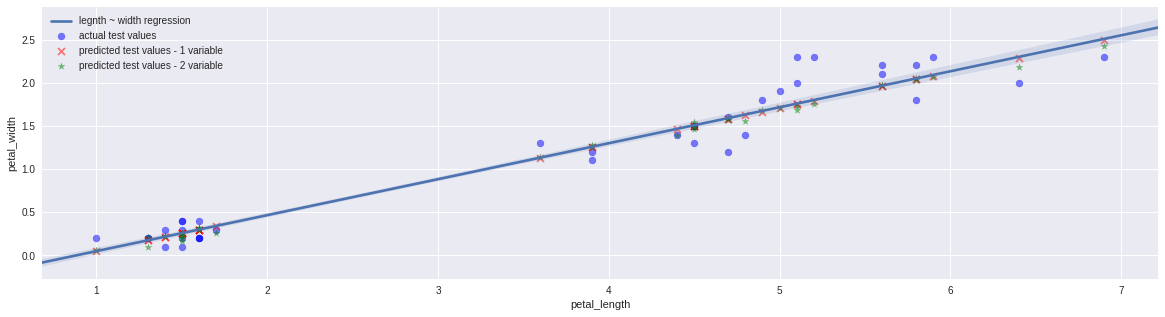

In [8]:
target, features = dmatrices("petal_width ~ petal_length + sepal_length", iris_df)

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)

petal_width_prediction_2_var = linear_regression_model.predict(features_test)

plt.figure(1, (20,5))


plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, label='actual test values')

plt.scatter(features_test[:, 1], petal_width_prediction_1_var,
            marker='x', color='red', alpha=0.5, label='predicted test values - 1 variable')

plt.scatter(features_test[:, 1], petal_width_prediction_2_var,
            marker='*', color='green', alpha=0.5, label='predicted test values - 2 variable')

sns.regplot('petal_length', 'petal_width', data=iris_df, scatter=False, label='legnth ~ width regression')
plt.legend()

In [9]:
target, features = dmatrices("petal_width ~ petal_length + sepal_length + sepal_width", iris_df)

In [10]:
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)
petal_width_prediction_3_var = linear_regression_model.predict(features_test)

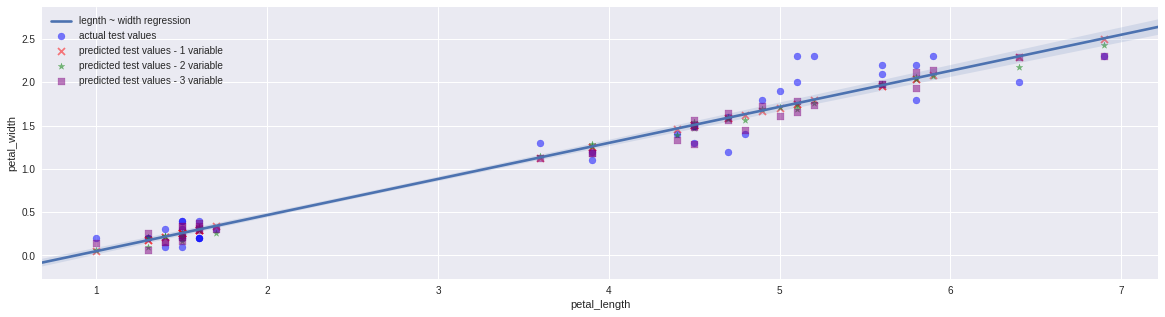

In [11]:
plt.figure(1, (20,5))

plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, label='actual test values')

plt.scatter(features_test[:, 1], petal_width_prediction_1_var,
            marker='x', color='red', alpha=0.5, label='predicted test values - 1 variable')

plt.scatter(features_test[:, 1], petal_width_prediction_2_var,
            marker='*', color='green', alpha=0.5, label='predicted test values - 2 variable')

plt.scatter(features_test[:, 1], petal_width_prediction_3_var,
            marker='s', color='purple', alpha=0.5, label='predicted test values - 3 variable')

sns.regplot('petal_length', 'petal_width', data=iris_df, scatter=False, label='legnth ~ width regression')

plt.legend()

In [12]:
x_values = features_test[:, 1]
y_values = target_test
y_hat_1_values = petal_width_prediction_1_var
y_hat_2_values = petal_width_prediction_2_var
y_hat_3_values = petal_width_prediction_3_var

y_hat = (y_hat_1_values, y_hat_2_values, y_hat_3_values)

points = list(zip(x_values, y_values, y_hat_1_values, y_hat_2_values, y_hat_3_values))

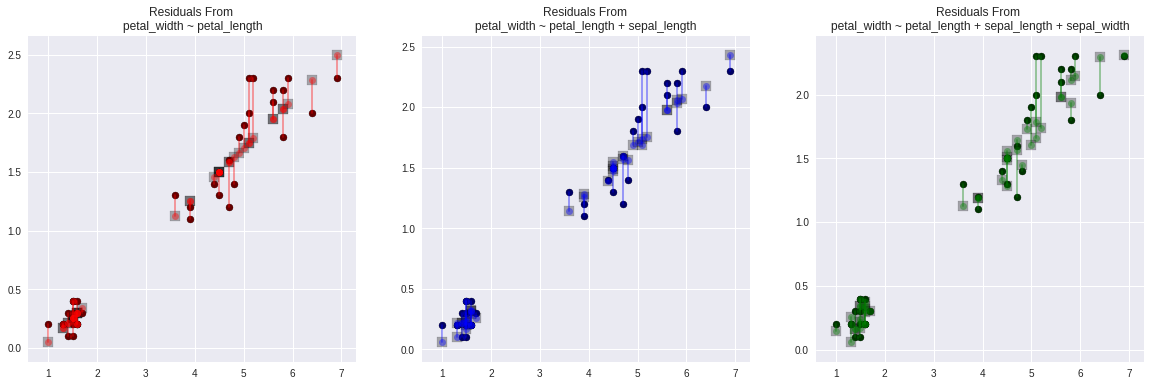

In [13]:
_, ax = plt.subplots(1,3,figsize=(20,6))

for point in points:
    x, y, y_hat_1, y_hat_2, y_hat_3 = point
    ax[0].plot([x,x], [y,y_hat_1], 'ro-', alpha=0.4)
    ax[0].set_title('Residuals From \npetal_width ~ petal_length')
    ax[1].plot([x,x], [y,y_hat_2], 'bo-', alpha=0.4)
    ax[1].set_title('Residuals From \npetal_width ~ petal_length + sepal_length')
    ax[2].plot([x,x], [y,y_hat_3], 'go-', alpha=0.4)
    ax[2].set_title('Residuals From \npetal_width ~ petal_length + sepal_length + sepal_width')

for i, a in enumerate(ax):    
    a.scatter(features_test[:, 1],
              target_test, marker='o', color='black')
    a.scatter(features_test[:, 1],
              y_hat[i], marker='s', s=100, alpha=0.3, color='black')


### Interpret these plots

In particular, make note of the fact that the residuals are not the same across the three plots. Why do you think this is?

The residuals in the plots are showing us the difference when one predictor variable can be generate a linear prediction with reasonable accuracy. Different features and multiple variables are being compared among the three plots, the coefficients on the multiple regression generatevariances that could exists with changes in the beta for each.